In [81]:
# import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as se

%matplotlib inline

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import warnings 
warnings.filterwarnings('ignore')

In [82]:
# import dataset

ds = pd.read_csv("train.csv")
ds.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [83]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [84]:
ds.shape

(1460, 81)

In [85]:
ds.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [86]:
ds.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

### Check for null values in categorical variables ###

In [87]:
ds.select_dtypes(include='object').isnull().sum()[ds.select_dtypes(include='object').isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

### Replacing NA with None ###

In [88]:
for col_na in ('Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
               'BsmtFinType2','Electrical','FireplaceQu','GarageType','GarageFinish',
               'GarageQual','GarageCond','PoolQC','Fence','MiscFeature'): 
                ds[col_na]= ds[col_na].fillna('None')

### Identify duplicate rows ###

In [89]:
ds.duplicated().value_counts()

False    1460
dtype: int64

### Identify features with > 90% duplicate data

In [91]:
def dupcat():
    dup_column = []
    cat_feature = ds.select_dtypes(include = ['object'])

    for cl in (cat_feature):
        if(ds[cl].value_counts().max() >= 1314):
            dup_column.append(cl)
    return dup_column

drop_col = dupcat()
print(drop_col)

['Street', 'Alley', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageCond', 'PavedDrive', 'PoolQC', 'MiscFeature']


# Observations

#### There are 14 columns with > 90% same values

# Action
#### Drop these columns

In [92]:
ds.drop(drop_col, axis = 1, inplace=True)
ds.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,...,0,0,0,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,...,0,0,0,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,...,0,0,0,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,...,0,0,0,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,...,0,0,0,None,0,12,2008,WD,Normal,250000


### Identify features with > 85% duplicate data

In [93]:
def dupcat():
    dup_column = []
    cat_feature = ds.select_dtypes(include = ['object'])

    for cl in (cat_feature):
        if(ds[cl].value_counts().max() >= 1241):
            dup_column.append(cl)
    return dup_column

drop_col = dupcat()
print(drop_col)

['LandContour', 'Condition1', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'GarageQual', 'SaleType']


# Observation

#### There are 7 columns with > 85% duplicate values.

# Action
#### Drop these columns.

In [94]:
ds.drop(drop_col, axis = 1, inplace=True)
ds.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,2,2008,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,0,None,0,5,2007,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,9,2008,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,272,0,0,0,None,0,2,2006,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,0,None,0,12,2008,Normal,250000


### Remove null values from continuous variables ###

In [95]:
ds.select_dtypes(include=['int64','float']).isnull().sum()[ds.select_dtypes(include=['int64','float']).isnull().sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [96]:
ds['LotFrontage'] = ds['LotFrontage'].replace(np.nan, ds['LotFrontage'].median())
ds['MasVnrArea'] = ds['MasVnrArea'].replace(np.nan, ds['MasVnrArea'].median())

In [97]:
#Caluclate property age at the time of selling based on construction / remodel date

def NewOld(row):
    if (row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
ds['orVSremod'] = ds.apply(NewOld, axis=1)

def PropertyAge(row):
    if (row['orVSremod'] == 0):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
    
ds['PropertyAge'] = ds.apply(PropertyAge, axis=1)
ds.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,orVSremod,PropertyAge
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,2,2008,Normal,208500,0,5
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,None,0,5,2007,Normal,181500,0,31
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,9,2008,Normal,223500,1,6
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,None,0,2,2006,Abnorml,140000,1,36
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,None,0,12,2008,Normal,250000,0,8


In [98]:
#Garage Age: >20 years is old else new

ds['GarageYrBlt'] = ds['GarageYrBlt'].fillna(0)
ds['GarageYrBlt'] = ds['GarageYrBlt'].astype(int)

# new or old garage

def GarageAge(row):
    if row == 0: #
        return 0
    elif row >=1900 and row < 2002:
        return 0
    else:
        return 1

ds['GarageAge'] = ds['GarageYrBlt'].apply(GarageAge)

ds.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,orVSremod,PropertyAge,GarageAge
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,None,0,2,2008,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,None,0,5,2007,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,None,0,9,2008,Normal,223500,1,6,0
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,None,0,2,2006,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,None,0,12,2008,Normal,250000,0,8,0


In [99]:
#Drop redundant columns
ds.drop(['YearBuilt', 'YearRemodAdd', 'YrSold','GarageYrBlt'], axis = 1, inplace = True)

In [100]:
ds.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,SaleCondition,SalePrice,orVSremod,PropertyAge,GarageAge
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,2,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,None,0,5,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,9,Normal,223500,1,6,0
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,None,0,2,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,None,0,12,Normal,250000,0,8,0


In [101]:
def NumericNullCount():
    RepCol = []
    numerical_col = ds.select_dtypes(include =['int64', 'float'])
    for cl in (numerical_col):
        if (ds[cl].value_counts().max() >= 1241):
            RepCol.append(cl)
    return RepCol

drop_col = NumericNullCount()

print(drop_col)

['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [102]:
ds.drop(drop_col, axis =1, inplace = True)
ds.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageArea,WoodDeckSF,OpenPorchSF,Fence,MoSold,SaleCondition,SalePrice,orVSremod,PropertyAge,GarageAge
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,548,0,61,None,2,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,460,298,0,None,5,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,608,0,42,None,9,Normal,223500,1,6,0
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,642,0,35,None,2,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,836,192,84,None,12,Normal,250000,0,8,0


### Ascertain Outliers ###

In [103]:
ds.describe(percentiles = [.25,.5,.75,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,orVSremod,PropertyAge,GarageAge
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,567.240411,1057.429452,...,0.613014,1.767123,472.980137,94.244521,46.660274,6.321918,180921.195890,0.476712,22.950000,0.243151
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,441.866955,438.705324,...,0.644666,0.747315,213.804841,125.338794,66.256028,2.703626,79442.502883,0.499629,20.640653,0.429132
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,0.000000,-1.000000,0.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,...,0.000000,1.000000,334.500000,0.000000,0.000000,5.000000,129975.000000,0.000000,4.000000,0.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,...,1.000000,2.000000,480.000000,0.000000,25.000000,6.000000,163000.000000,0.000000,14.000000,0.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,808.000000,1298.250000,...,1.000000,2.000000,576.000000,168.000000,68.000000,8.000000,214000.000000,1.000000,41.000000,0.000000
99%,1445.410000,190.000000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,1797.050000,2155.050000,...,2.000000,3.000000,1002.790000,505.460000,285.820000,12.000000,442567.010000,1.000000,60.000000,1.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,2336.000000,6110.000000,...,3.000000,4.000000,1418.000000,857.000000,547.000000,12.000000,755000.000000,1.000000,60.000000,1.000000


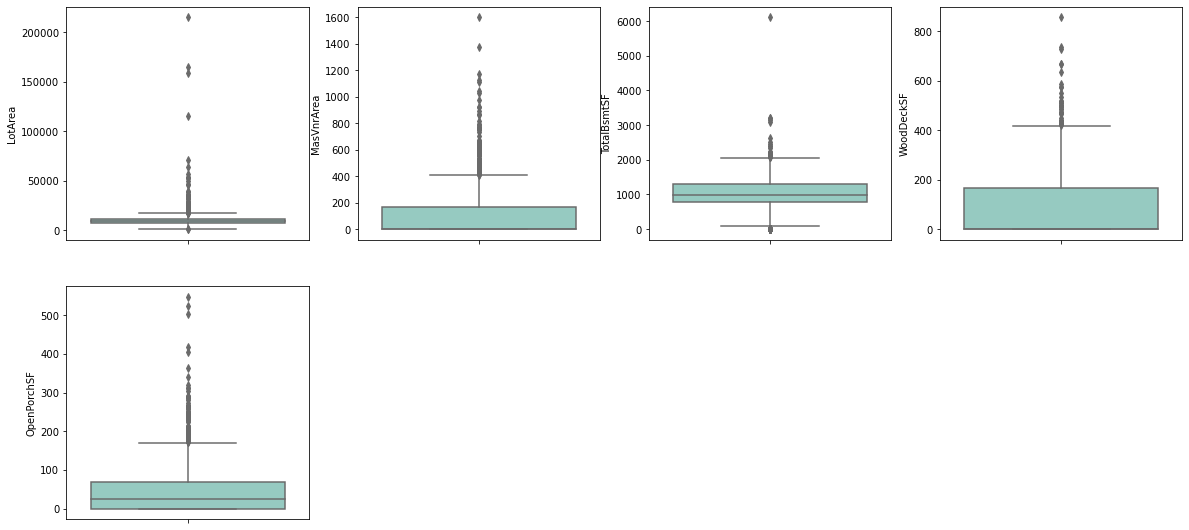

In [104]:
plt.figure(figsize = (20,30))
plt.subplot(6,4,1)
se.boxplot(y= 'LotArea', palette = 'Set3', data = ds)
plt.subplot(6,4,2)
se.boxplot(y= 'MasVnrArea', palette = 'Set3', data = ds)
plt.subplot(6,4,3)
se.boxplot(y= 'TotalBsmtSF', palette = 'Set3', data = ds)
plt.subplot(6,4,4)
se.boxplot(y= 'WoodDeckSF', palette = 'Set3', data = ds)
plt.subplot(6,4,5)
se.boxplot(y= 'OpenPorchSF', palette = 'Set3', data = ds)

plt.show()

### Observations ###
There are many outliers in all columns

### Action ### 
Remove outliers

In [105]:
outLotArea = ds['LotArea'].quantile(0.99)
ds = ds[ds['LotArea'] < outLotArea]


outMasVnrArea = ds['MasVnrArea'].quantile(0.99)
ds = ds[ds['MasVnrArea'] < outMasVnrArea]

outTotalBsmtSF = ds['TotalBsmtSF'].quantile(0.99)
ds = ds[ds['TotalBsmtSF'] < outTotalBsmtSF]


outWoodDeckSF = ds['WoodDeckSF'].quantile(0.99)
ds = ds[ds['WoodDeckSF'] < outWoodDeckSF]

outOpenPorchSF = ds['OpenPorchSF'].quantile(0.99)
ds = ds[ds['OpenPorchSF'] < outOpenPorchSF]

ret_data = round(100*(len(ds)/1460),2)

print(ret_data)

94.93


# Data Visualization ! 

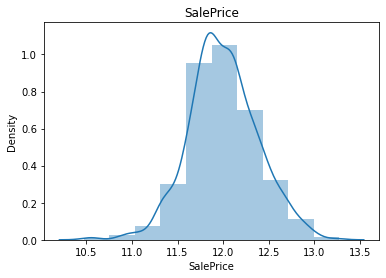

In [106]:
ds['SalePrice'] = np.log1p(ds['SalePrice'])

# Ploting sales price as target variable

plt.title('SalePrice')
se.distplot(ds['SalePrice'], bins =10)
plt.show()

<Figure size 864x432 with 0 Axes>

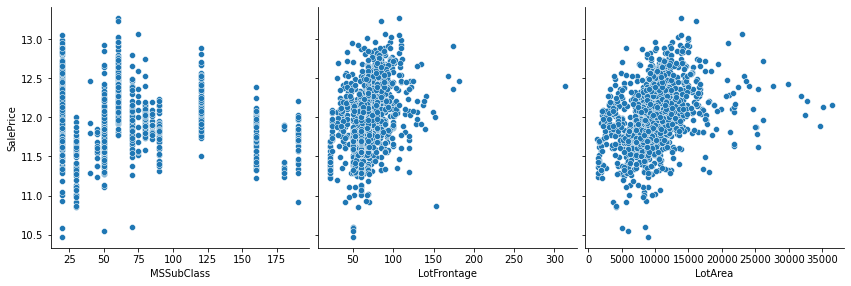

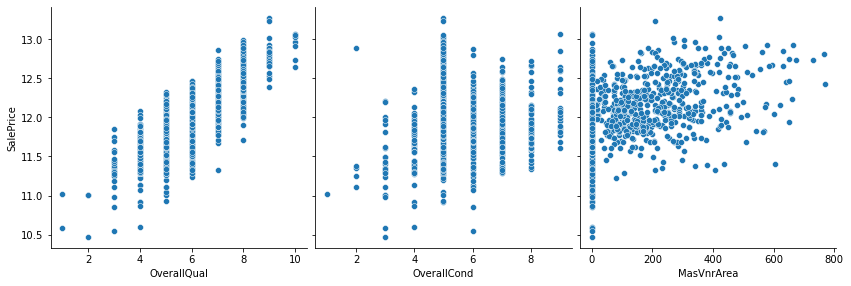

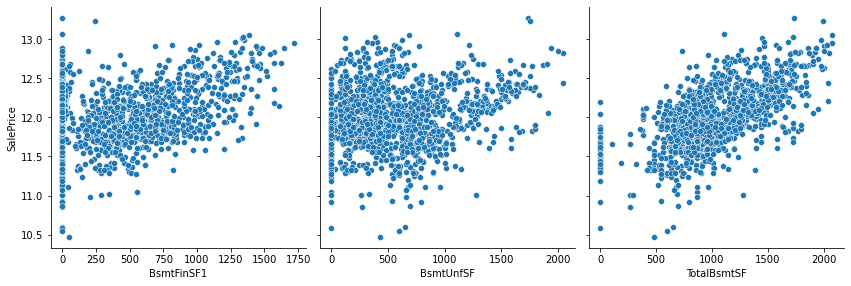

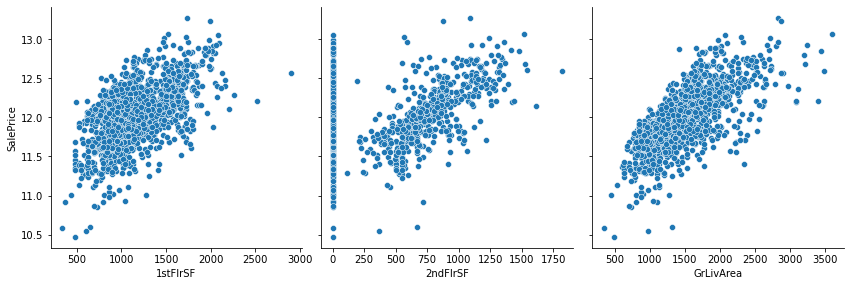

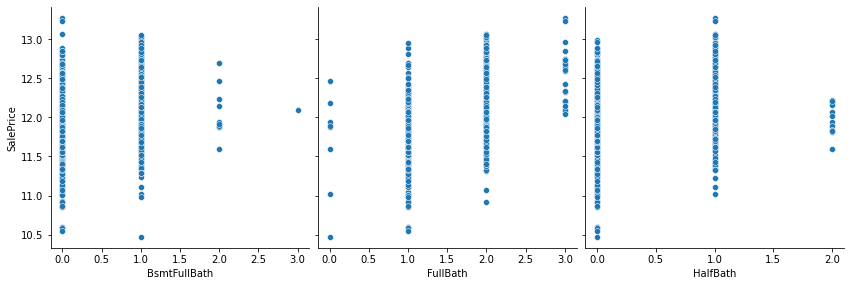

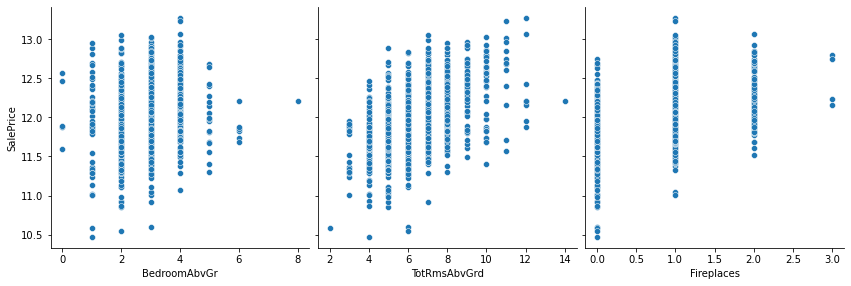

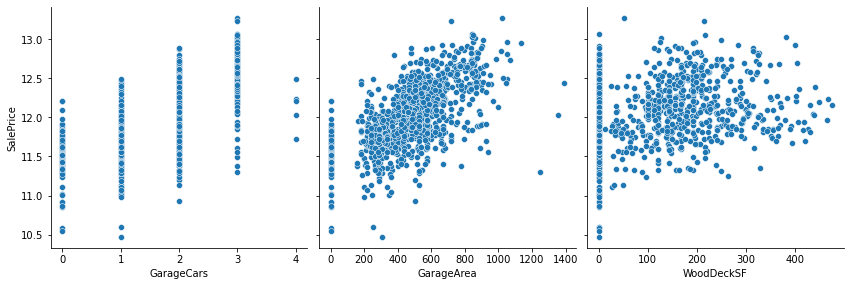

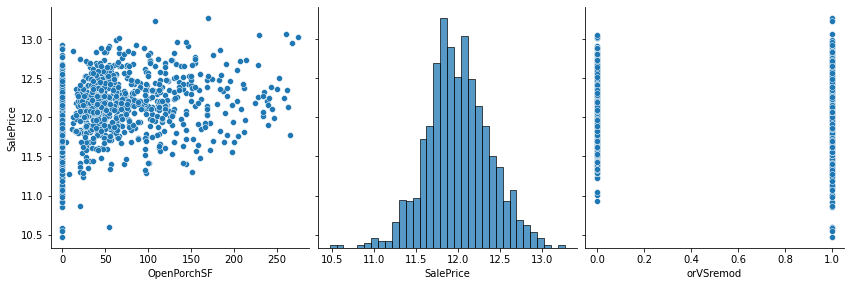

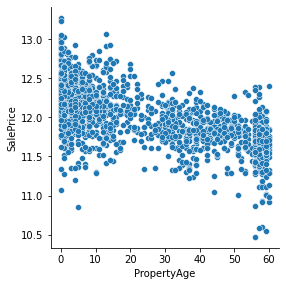

In [107]:
plt.figure(figsize =(12,6))
se.pairplot(ds, x_vars = ['MSSubClass', 'LotFrontage','LotArea'], y_vars = 'SalePrice', height=4, aspect =1, kind= 'scatter')
se.pairplot(ds, x_vars = ['OverallQual', 'OverallCond','MasVnrArea'], y_vars = 'SalePrice', height=4, aspect =1, kind= 'scatter')
se.pairplot(ds, x_vars = ['BsmtFinSF1','BsmtUnfSF','TotalBsmtSF'], y_vars = 'SalePrice', height=4, aspect =1, kind= 'scatter')
se.pairplot(ds, x_vars = ['1stFlrSF','2ndFlrSF','GrLivArea'], y_vars = 'SalePrice', height=4, aspect =1, kind= 'scatter')
se.pairplot(ds, x_vars = ['BsmtFullBath','FullBath','HalfBath'],y_vars = 'SalePrice', height=4, aspect =1, kind= 'scatter')
se.pairplot(ds, x_vars = ['BedroomAbvGr','TotRmsAbvGrd','Fireplaces'],y_vars = 'SalePrice', height=4, aspect =1, kind= 'scatter')
se.pairplot(ds, x_vars = ['GarageCars','GarageArea','WoodDeckSF'],y_vars = 'SalePrice', height=4, aspect =1, kind= 'scatter')
se.pairplot(ds, x_vars = ['OpenPorchSF','SalePrice','orVSremod'],y_vars = 'SalePrice', height=4, aspect =1, kind= 'scatter')
se.pairplot(ds, x_vars = ['PropertyAge'],y_vars = 'SalePrice', height=4, aspect =1, kind= 'scatter')

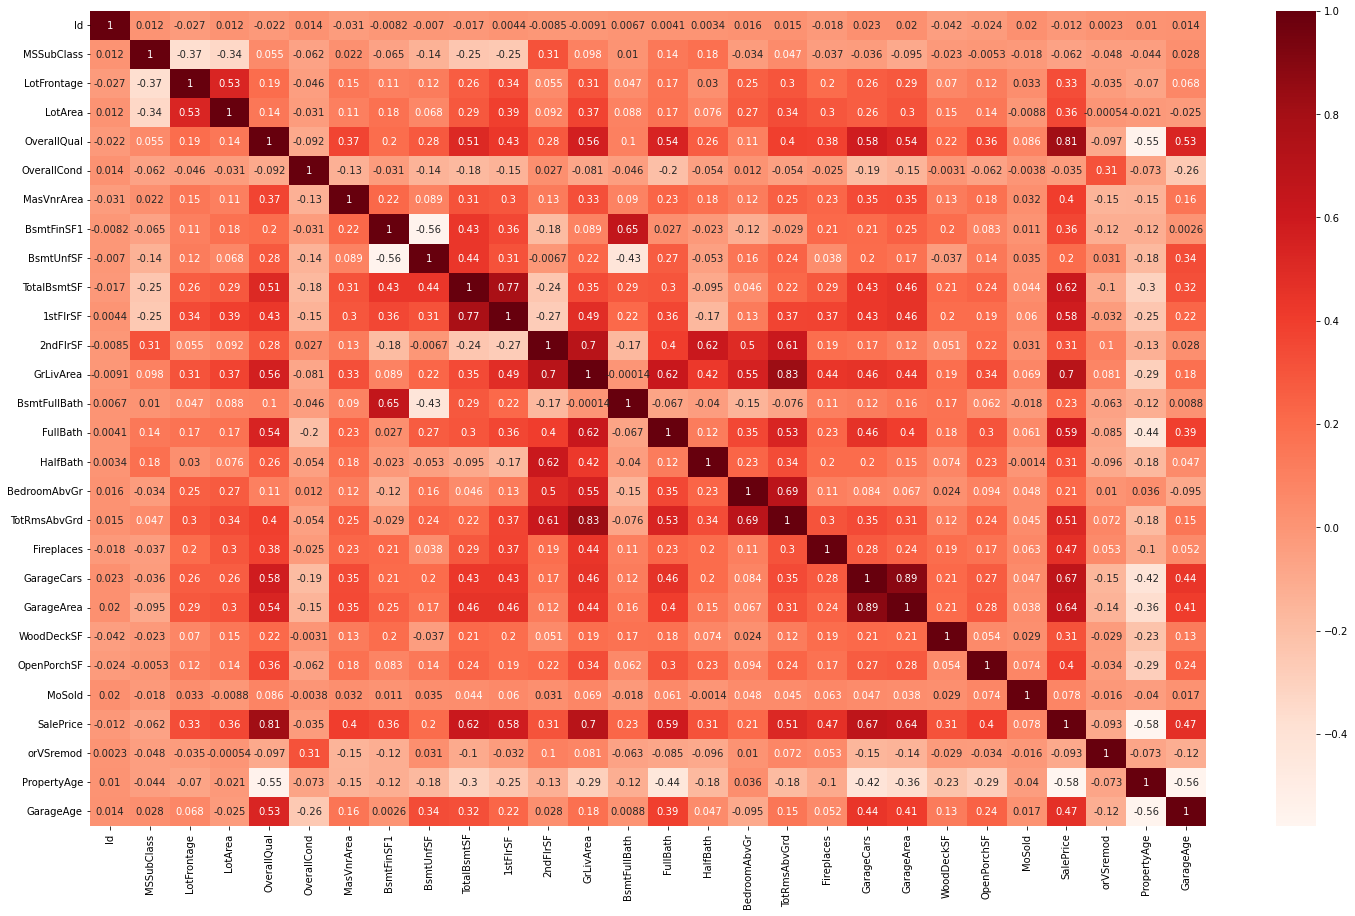

In [108]:
plt.figure(figsize = (25,15))
se.heatmap(ds.corr(), annot = True, cmap = "Reds")
plt.show()

# Observations #

1. TotRmsAbvGrd and GrLivArea show 83% correlation
2. GarageArea and GarageCars show 89% correlation

# Action #
Remove correlated columns

In [109]:
ds.drop(['TotRmsAbvGrd','GarageArea'], axis = 1, inplace = True)
ds.shape

(1386, 48)

In [110]:
ds.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageCars,WoodDeckSF,OpenPorchSF,Fence,MoSold,SaleCondition,SalePrice,orVSremod,PropertyAge,GarageAge
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,2,0,61,None,2,Normal,12.247699,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,2,298,0,None,5,Normal,12.109016,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,2,0,42,None,9,Normal,12.317171,1,6,0
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,3,0,35,None,2,Abnorml,11.849405,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,3,192,84,None,12,Normal,12.429220,0,8,0


# Prepare Data

In [111]:
ds['New_LotShape'] = ds['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3':0})
ds['New_ExterQual'] = ds['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po':1, 'None': 0})
ds['New_BsmtQual'] = ds['BsmtQual'].map({'Ex':5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po':1, 'None': 0})
ds['New_HeatingQC'] = ds['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
ds['New_KitchenQual'] = ds['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
ds['New_FireplaceQu'] = ds['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po':1, 'None': 0})
ds['New_BsmtExposure'] = ds['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
ds['New_BsmtFinType1'] = ds['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 
                                                                     'Unf': 1, 'None': 0})
ds['New_GarageFinish'] = ds['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0})
ds['New_BldgType'] = ds['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, 
                                                             '1Fam': 1, 'None': 0})
ds['New_HouseStyle'] = ds['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4,
                                                                '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0})
ds['New_Fence'] = ds['Fence'].map({'GdPrv':4, 'GdWo': 3, 'MnPrv': 2,'MnWw':1,'None':0 })
ds['New_LotConfig'] = ds['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 
                                                              'FR3': 1, 'None': 0})

ds['New_MasVnrType'] = ds['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'Cblock': 1, 'Stone': 1, 
                                                                 'None': 0})
ds['New_SaleCondition'] = ds['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0,
                                                                       'Alloca': 0, 'AdjLand': 0, 'None': 0})

In [112]:
ds.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,New_FireplaceQu,New_BsmtExposure,New_BsmtFinType1,New_GarageFinish,New_BldgType,New_HouseStyle,New_Fence,New_LotConfig,New_MasVnrType,New_SaleCondition
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,1,6,2,1,4,0,5,1,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,3,4,5,2,1,1,0,2,0,1
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,3,2,6,2,1,4,0,5,1,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,4,1,5,1,1,4,0,4,0,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,3,3,6,2,1,4,0,2,1,1


In [113]:
ds = ds.drop(['Id', 'LotShape','ExterQual','BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 'Fence', 'LotConfig',
                                 'MasVnrType', 'SaleCondition'], axis = 1)

In [114]:
ds.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,New_FireplaceQu,New_BsmtExposure,New_BsmtFinType1,New_GarageFinish,New_BldgType,New_HouseStyle,New_Fence,New_LotConfig,New_MasVnrType,New_SaleCondition
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,0,1,6,2,1,4,0,5,1,1
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,3,4,5,2,1,1,0,2,0,1
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,3,2,6,2,1,4,0,5,1,1
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,4,1,5,1,1,4,0,4,0,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,3,3,6,2,1,4,0,2,1,1


In [115]:
#Create Dummy variables

# MSZoning
dm_MSZoning = pd.get_dummies(ds['MSZoning'], prefix = 'MSZoning', drop_first = True)
ds = pd.concat([ds, dm_MSZoning], axis = 1)

# Neighborhood
dm_Neighborhood = pd.get_dummies(ds['Neighborhood'], prefix = 'Neighborhood', drop_first = True)
ds = pd.concat([ds, dm_Neighborhood], axis = 1)

# RoofStyle
dm_RoofStyle = pd.get_dummies(ds['RoofStyle'], prefix = 'RoofStyle', drop_first = True)
ds = pd.concat([ds, dm_RoofStyle], axis = 1)

# Exterior1st
dm_Exterior1st = pd.get_dummies(ds['Exterior1st'], prefix = 'Exterior1st', drop_first = True)
ds = pd.concat([ds, dm_Exterior1st], axis = 1)

# Exterior2nd
dm_Exterior2nd = pd.get_dummies(ds['Exterior2nd'], prefix = 'Exterior2nd', drop_first = True)
ds = pd.concat([ds, dm_Exterior2nd], axis = 1)

# Foundation
dm_Foundation = pd.get_dummies(ds['Foundation'], prefix = 'Foundation', drop_first = True)
ds = pd.concat([ds, dm_Foundation], axis = 1)

# GarageType
dm_GarageType = pd.get_dummies(ds['GarageType'], prefix = 'GarageType', drop_first = True)
ds = pd.concat([ds, dm_GarageType], axis = 1)

In [116]:
ds.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0


In [117]:
ds = ds.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 
                                  'Exterior2nd', 'Foundation', 'GarageType'], axis=1)

In [118]:
ds.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,1,0,0,0,0,0


In [119]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1386 entries, 0 to 1458
Columns: 113 entries, MSSubClass to GarageType_None
dtypes: float64(3), int64(37), uint8(73)
memory usage: 542.8 KB


# Regression Analysis Begins

In [120]:
# Define Dependent and Independent Variables
y = ds['SalePrice']
X = ds.drop(['SalePrice'], axis=1)

In [121]:
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [122]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,1,0,0,0,0,0


In [123]:
#Data Scaling

# importing scale library
from sklearn.preprocessing import scale

cols = X.columns

X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_None'],
      dtype='object', length=112)

In [124]:
# Train and Test Split 

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [126]:
#Model Cretion
lm = LinearRegression()
lm.fit(X_train, y_train)

# Executing RFE

rfe = RFE(lm,50)
rfe = rfe.fit(X_train, y_train)

col = X_train.columns[rfe.support_]

# Creating dataframe with slected 50 features

dt_fifty = pd.DataFrame(list(zip(X_train.columns,rfe.support_, rfe.ranking_)), columns =['Feature', 'rfe_support', 'rfe_ranking'])
dt_fifty = dt_fifty.loc[dt_fifty['rfe_support'] == True]
dt_fifty.reset_index(drop = True, inplace=True)

dt_fifty

,Feature,rfe_support,rfe_ranking
0,MSSubClass,True,1
1,LotArea,True,1
2,OverallQual,True,1
3,OverallCond,True,1
4,MasVnrArea,True,1
5,BsmtFinSF1,True,1
6,TotalBsmtSF,True,1
7,GrLivArea,True,1
8,BsmtFullBath,True,1
9,FullBath,True,1


In [127]:
X_train_rfe = X_train[col]

X_train = X_train_rfe[X_train_rfe.columns]
X_test = X_test[X_train.columns]

# Model Evaluation

### Ridge

In [204]:
params = {'alpha': [0.0001,0.001,0.01,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,
                   6.0,7.0,10.0,12.0,14.0, 16.0, 18.0, 20,50,100,500,1000]}

ridge = Ridge()

# Cross Validation

folds = 5
ridge_model_cval = GridSearchCV(estimator = ridge, 
                               param_grid = params,
                               scoring = 'neg_mean_absolute_error',
                               cv = folds,
                               return_train_score = True,
                               verbose = 1)
ridge_model_cval.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [205]:
# Mean scores

ridge_cval_output = pd.DataFrame(ridge_model_cval.cv_results_)
ridge_cval_output = ridge_cval_output[ridge_cval_output['param_alpha']<=500]
ridge_cval_output[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
23,20,-0.074612,-0.081901,1
22,18.0,-0.074569,-0.081908,2
21,16.0,-0.074525,-0.081915,3
20,14.0,-0.074482,-0.081921,4
19,12.0,-0.074434,-0.081931,5
18,10.0,-0.074378,-0.081942,6
17,7.0,-0.074277,-0.081955,7
16,6.0,-0.074245,-0.081974,8
24,50,-0.075155,-0.081974,9
15,5.0,-0.074210,-0.081995,10


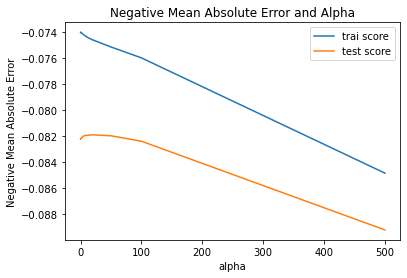

In [206]:
ridge_cval_output['param_alpha'] = ridge_cval_output['param_alpha'].astype('int32')

# plottting

plt.plot(ridge_cval_output['param_alpha'], ridge_cval_output['mean_train_score'])
plt.plot(ridge_cval_output['param_alpha'], ridge_cval_output['mean_test_score'])
plt.xlabel ('alpha')
plt.ylabel ('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and Alpha")
plt.legend(['trai score', 'test score'], loc = 'upper right')
plt.show()

In [207]:
ridge_model_cval.best_estimator_

Ridge(alpha=20)

In [197]:
# Check the coefficient values with lambda value as 10
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.02548618,  0.02061837,  0.07796159,  0.04277981,  0.00943668,
        0.02352066,  0.05328556,  0.09775862,  0.01315844,  0.0172918 ,
        0.01525053,  0.0330767 ,  0.01305702, -0.01568431, -0.02551291,
        0.00884415,  0.01373726,  0.01209439,  0.01395128,  0.01984073,
        0.01261439,  0.00847188,  0.01058067,  0.01295259,  0.0161188 ,
        0.04141814,  0.02003641,  0.05736801,  0.02132706,  0.01682872,
        0.02257033,  0.02010554,  0.01714817, -0.00997862,  0.01330756,
       -0.01273197, -0.01839446,  0.01259772,  0.01210712, -0.01072395,
        0.01591065,  0.03957116,  0.01667922,  0.00568042,  0.01944556,
       -0.0011134 ,  0.01100526, -0.00354744,  0.01413137,  0.00082682])

In [198]:
mean_squared_error(y_test, ridge.predict(X_test))

0.0160247641098892

In [199]:
new_df_ridge = pd.DataFrame({'Features': X_train.columns, 'Coefficient': ridge.coef_.round(4)})
new_df_ridge.reset_index(drop=True, inplace=True)
new_df_ridge

,Features,Coefficient
0,MSSubClass,-0.0255
1,LotArea,0.0206
2,OverallQual,0.0780
3,OverallCond,0.0428
4,MasVnrArea,0.0094
5,BsmtFinSF1,0.0235
6,TotalBsmtSF,0.0533
7,GrLivArea,0.0978
8,BsmtFullBath,0.0132
9,FullBath,0.0173


In [184]:
ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'MSSubClass': -0.0244,
 'LotArea': 0.021,
 'OverallQual': 0.0764,
 'OverallCond': 0.0421,
 'MasVnrArea': 0.0104,
 'BsmtFinSF1': 0.0232,
 'TotalBsmtSF': 0.0527,
 'GrLivArea': 0.094,
 'BsmtFullBath': 0.0131,
 'FullBath': 0.0192,
 'HalfBath': 0.0162,
 'GarageCars': 0.0326,
 'WoodDeckSF': 0.0129,
 'orVSremod': -0.0153,
 'PropertyAge': -0.0255,
 'GarageAge': 0.0088,
 'New_BsmtQual': 0.0139,
 'New_HeatingQC': 0.0123,
 'New_KitchenQual': 0.0154,
 'New_FireplaceQu': 0.0205,
 'New_BsmtExposure': 0.0126,
 'New_BsmtFinType1': 0.0088,
 'New_GarageFinish': 0.0105,
 'New_HouseStyle': 0.0125,
 'New_SaleCondition': 0.0164,
 'MSZoning_FV': 0.0326,
 'MSZoning_RH': 0.0157,
 'MSZoning_RL': 0.0418,
 'MSZoning_RM': 0.007,
 'Neighborhood_BrkSide': 0.0162,
 'Neighborhood_Crawfor': 0.0222,
 'Neighborhood_NridgHt': 0.0196,
 'Neighborhood_StoneBr': 0.0168,
 'Exterior1st_BrkComm': -0.0097,
 'Exterior1st_BrkFace': 0.0136,
 'Exterior1st_CemntBd': -0.0086,
 'Exterior1st_Wd Sdng': -0.0162,
 'Exterior2nd_CmentBd': 0.

In [208]:
X_train_rd = X_train[new_df_ridge.Features]
lm = LinearRegression()
lm.fit(X_train_rd, y_train)

# Executing RFE for 15 features

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train_rd, y_train)

In [209]:
def determine(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to new dataframe for further usage in bar plot

dt_ten = pd.DataFrame(list(zip(X_train_rd.columns,rfe.support_, rfe.ranking_)), columns =['Features', 'rfe_support', 'rfe_ranking'])
dt_ten = dt_ten.loc[dt_ten['rfe_support'] == True]
dt_ten.reset_index(drop = True, inplace=True)

dt_ten['Coefficient'] = dt_ten['Features'].apply(determine)
dt_ten = dt_ten.sort_values(by=['Coefficient'], ascending=False)
dt_ten = dt_ten.head(10)   # Considering only top 10 features
dt_ten

,Features,rfe_support,rfe_ranking,Coefficient
5,GrLivArea,True,1,0.0940
1,OverallQual,True,1,0.0764
4,TotalBsmtSF,True,1,0.0527
2,OverallCond,True,1,0.0421
12,MSZoning_RL,True,1,0.0418
14,Foundation_PConc,True,1,0.0355
6,GarageCars,True,1,0.0326
10,MSZoning_FV,True,1,0.0326
3,BsmtFinSF1,True,1,0.0232
0,LotArea,True,1,0.0210


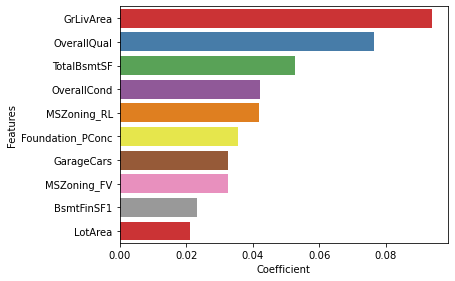

In [187]:
plt.figure(figsize = (20,20))
plt.subplot(4,3,1)
se.barplot(y = 'Features', x = 'Coefficient', palette = 'Set1', data = dt_ten)
plt.show()

## Lasso

In [188]:
lasso = Lasso()

# Alpha values

params = {'alpha': [0.0001,0.0002,0.0003,0.0004,0.0005,0.001,0.002,0.003,0.004,0.005,0.01]}

folds = 5

lasso_model_cvl = GridSearchCV(estimator = lasso,
                              param_grid = params,
                              scoring = 'neg_mean_absolute_error',
                              cv = folds,
                              return_train_score = True,
                              verbose = 1)
lasso_model_cvl.fit(X_train, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [189]:
lasso_cvl_output = pd.DataFrame(lasso_model_cvl.cv_results_)
lasso_cvl_output[['param_alpha','mean_train_score','mean_test_score','rank_test_score']].sort_values(by =['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
4,0.0005,-0.074421,-0.082110,1
3,0.0004,-0.074366,-0.082126,2
2,0.0003,-0.074295,-0.082160,3
1,0.0002,-0.074178,-0.082191,4
5,0.001,-0.074848,-0.082247,5
0,0.0001,-0.074095,-0.082304,6
6,0.002,-0.075440,-0.082579,7
7,0.003,-0.075851,-0.083079,8
8,0.004,-0.076392,-0.083707,9
9,0.005,-0.077100,-0.084332,10


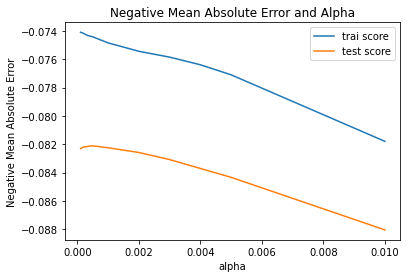

In [190]:
lasso_cvl_output['param_alpha'] = lasso_cvl_output['param_alpha'].astype('float64')

# plottting

plt.plot(lasso_cvl_output['param_alpha'], lasso_cvl_output['mean_train_score'])
plt.plot(lasso_cvl_output['param_alpha'], lasso_cvl_output['mean_test_score'])
plt.xlabel ('alpha')
plt.ylabel ('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and Alpha")
plt.legend(['trai score', 'test score'], loc = 'upper right')
plt.show()

In [191]:
lasso_model_cvl.best_estimator_

Lasso(alpha=0.0005)

In [192]:
alpha = 0.0010

lasso = Lasso(alpha = alpha)
lasso.fit(X_train, y_train)
lasso.coef_

array([-0.0232847 ,  0.01861699,  0.0822971 ,  0.04334256,  0.00844356,
        0.02357557,  0.05240431,  0.10314836,  0.01252307,  0.01321953,
        0.01278817,  0.03360125,  0.01245891, -0.01568724, -0.02548805,
        0.0080646 ,  0.01164928,  0.01079277,  0.01330597,  0.01855568,
        0.01265198,  0.00827504,  0.01116964,  0.01030118,  0.01655514,
        0.03517432,  0.01495106,  0.04615775,  0.0083317 ,  0.01530374,
        0.0205286 ,  0.01905919,  0.01523474, -0.00941508,  0.01337269,
       -0.        , -0.0121094 ,  0.00014041,  0.00495622, -0.01047973,
        0.01120554,  0.03622155,  0.01407595,  0.00339852,  0.00498238,
       -0.00369352,  0.00384369, -0.00522961,  0.        , -0.00458224])

In [193]:
mean_squared_error(y_test,lasso.predict(X_test))

0.016071950600404474

In [194]:
lasso_new = pd.DataFrame({'Features': X_train.columns, 'Coefficient': lasso.coef_.round(4)})
lasso_new = lasso_new[lasso_new['Coefficient']!=0.00] # Feature eliminaions where coefficient is Zero
lasso_new.reset_index(drop =True, inplace=True)
lasso_new

,Features,Coefficient
0,MSSubClass,-0.0233
1,LotArea,0.0186
2,OverallQual,0.0823
3,OverallCond,0.0433
4,MasVnrArea,0.0084
5,BsmtFinSF1,0.0236
6,TotalBsmtSF,0.0524
7,GrLivArea,0.1031
8,BsmtFullBath,0.0125
9,FullBath,0.0132


In [147]:
lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'MSSubClass': -0.025029191344002156,
 'LotArea': 0.019396887764436238,
 'OverallQual': 0.08050795311490502,
 'OverallCond': 0.04304280194805983,
 'MasVnrArea': 0.008237429724668517,
 'BsmtFinSF1': 0.023729762800829456,
 'TotalBsmtSF': 0.0527807738331176,
 'GrLivArea': 0.10316645907564066,
 'BsmtFullBath': 0.0125924486059175,
 'FullBath': 0.013639464613289937,
 'HalfBath': 0.013093445371437544,
 'GarageCars': 0.03394922316730866,
 'WoodDeckSF': 0.012605592591312192,
 'orVSremod': -0.01541877745666447,
 'PropertyAge': -0.02513904015347321,
 'GarageAge': 0.008494127749966657,
 'New_BsmtQual': 0.01294432788831424,
 'New_HeatingQC': 0.011452380153455531,
 'New_KitchenQual': 0.012790830125672593,
 'New_FireplaceQu': 0.018661767189668693,
 'New_BsmtExposure': 0.012964808101680948,
 'New_BsmtFinType1': 0.008026499264357112,
 'New_GarageFinish': 0.011163301038292264,
 'New_HouseStyle': 0.011739165456045518,
 'New_SaleCondition': 0.015736692176374724,
 'MSZoning_FV': 0.051235717160868645,
 'MSZ

In [195]:
X_train_lasso = X_train[lasso_new.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# Executing RFE 

rfe = RFE(lm,15)
rfe = rfe.fit(X_train_lasso, y_train)

In [196]:
def determine(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to new dataframe for further usage in bar plot

dtl_ten = pd.DataFrame(list(zip(X_train_lasso.columns,rfe.support_, rfe.ranking_)), columns =['Features', 'rfe_support', 'rfe_ranking'])
dtl_ten = dtl_ten.loc[dtl_ten['rfe_support'] == True]
dtl_ten.reset_index(drop = True, inplace=True)

dtl_ten['Coefficient'] = dtl_ten['Features'].apply(determine)
dtl_ten = dtl_ten.sort_values(by=['Coefficient'], ascending=False)
dtl_ten = dtl_ten.head(10)
dtl_ten

,Features,rfe_support,rfe_ranking,Coefficient
5,GrLivArea,True,1,0.103166
1,OverallQual,True,1,0.080508
12,MSZoning_RL,True,1,0.075934
4,TotalBsmtSF,True,1,0.052781
10,MSZoning_FV,True,1,0.051236
2,OverallCond,True,1,0.043043
14,Foundation_PConc,True,1,0.040828
13,MSZoning_RM,True,1,0.036561
6,GarageCars,True,1,0.033949
11,MSZoning_RH,True,1,0.023886


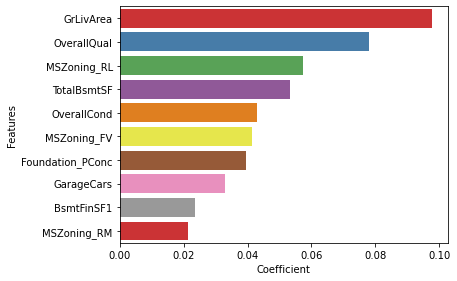

In [151]:
plt.figure(figsize = (20,20))
plt.subplot(4,3,1)
se.barplot(y = 'Features', x = 'Coefficient', palette = 'Set1', data = dt_ten)
plt.show()

# Removing top 5 features i.e. GrLivArea, OverallQual, MSZoning_RL, TotalBsmtSF, and OverallCond


In [210]:
X_train_red = X_train.drop(['GrLivArea','OverallQual', 'MSZoning_RL', 'TotalBsmtSF', 'OverallCond'], axis=1)
X_test_red = X_test.drop(['GrLivArea','OverallQual', 'MSZoning_RL', 'TotalBsmtSF', 'OverallCond'], axis=1)

lasso = Lasso()

# Alpha values

params = {'alpha': [0.0001,0.0002,0.0003,0.0004,0.0005,0.001,0.002,0.003,0.004,0.005,0.01]}

folds = 5

lasso_model_cvl = GridSearchCV(estimator = lasso,
                              param_grid = params,
                              scoring = 'neg_mean_absolute_error',
                              cv = folds,
                              return_train_score = True,
                              verbose = 1)
lasso_model_cvl.fit(X_train_red, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [213]:
lasso_cvl_output = pd.DataFrame(lasso_model_cvl.cv_results_)
lasso_cvl_output[['param_alpha','mean_train_score','mean_test_score','rank_test_score']].sort_values(by =['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
8,0.004,-0.109420,-0.117424,1
7,0.003,-0.109132,-0.117482,2
9,0.005,-0.109762,-0.117548,3
6,0.002,-0.108857,-0.117630,4
5,0.001,-0.108483,-0.117799,5
4,0.0005,-0.108279,-0.118123,6
3,0.0004,-0.108215,-0.118195,7
2,0.0003,-0.108124,-0.118322,8
1,0.0002,-0.108039,-0.118487,9
0,0.0001,-0.107954,-0.118652,10


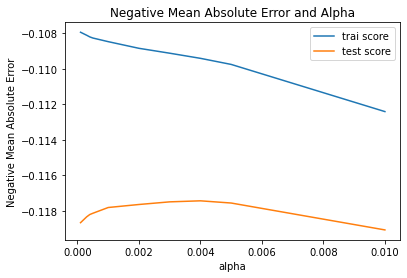

In [214]:
lasso_cvl_output['param_alpha'] = lasso_cvl_output['param_alpha'].astype('float64')

# plottting

plt.plot(lasso_cvl_output['param_alpha'], lasso_cvl_output['mean_train_score'])
plt.plot(lasso_cvl_output['param_alpha'], lasso_cvl_output['mean_test_score'])
plt.xlabel ('alpha')
plt.ylabel ('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and Alpha")
plt.legend(['trai score', 'test score'], loc = 'upper right')
plt.show()

In [215]:
lasso_model_cvl.best_estimator_

Lasso(alpha=0.004)

In [216]:
alpha = 0.004

lasso = Lasso(alpha = alpha)
lasso.fit(X_train_red, y_train)
lasso.coef_

array([-0.02776988,  0.04114406,  0.02885243,  0.04405957,  0.00556683,
        0.07567689,  0.03733718,  0.06003511,  0.00925706, -0.        ,
       -0.03777811, -0.        ,  0.04354304,  0.0230362 ,  0.04974731,
        0.05032289,  0.01356667,  0.00206949,  0.00364782,  0.01156349,
        0.01544778,  0.00391802,  0.00884208, -0.02146864,  0.01511118,
        0.03289845,  0.02063476,  0.02511192, -0.00758981,  0.01789607,
        0.        , -0.00065251,  0.00129969,  0.        , -0.00853139,
       -0.        ,  0.01569299, -0.        ,  0.        ,  0.01139674,
       -0.        ,  0.        , -0.00896757, -0.        , -0.        ])

In [217]:
mean_squared_error(y_test,lasso.predict(X_test_red))

0.027750738558395358

In [218]:
lasso_new = pd.DataFrame({'Features': X_train_red.columns, 'Coefficient': lasso.coef_.round(4)})
lasso_new = lasso_new[lasso_new['Coefficient']!=0.00] # Feature eliminaions where coefficient is Zero
lasso_new.reset_index(drop =True, inplace=True)
lasso_new

,Features,Coefficient
0,MSSubClass,-0.0278
1,LotArea,0.0411
2,MasVnrArea,0.0289
3,BsmtFinSF1,0.0441
4,BsmtFullBath,0.0056
5,FullBath,0.0757
6,HalfBath,0.0373
7,GarageCars,0.0600
8,WoodDeckSF,0.0093
9,PropertyAge,-0.0378


In [220]:
lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train_red.columns))
lasso_coeff_dict

{'MSSubClass': -0.02776988021451449,
 'LotArea': 0.04114405809983395,
 'MasVnrArea': 0.028852434010400177,
 'BsmtFinSF1': 0.0440595745990318,
 'BsmtFullBath': 0.00556683383528925,
 'FullBath': 0.07567688745289398,
 'HalfBath': 0.0373371757490864,
 'GarageCars': 0.060035105156938634,
 'WoodDeckSF': 0.00925706225626177,
 'orVSremod': -0.0,
 'PropertyAge': -0.03777811344056417,
 'GarageAge': -0.0,
 'New_BsmtQual': 0.04354304097893974,
 'New_HeatingQC': 0.02303619552134596,
 'New_KitchenQual': 0.04974730524498169,
 'New_FireplaceQu': 0.05032289035483351,
 'New_BsmtExposure': 0.01356667389645653,
 'New_BsmtFinType1': 0.002069494534813363,
 'New_GarageFinish': 0.00364782206242687,
 'New_HouseStyle': 0.011563494855298001,
 'New_SaleCondition': 0.015447777369242362,
 'MSZoning_FV': 0.003918019954136334,
 'MSZoning_RH': 0.008842077081527082,
 'MSZoning_RM': -0.021468640149747194,
 'Neighborhood_BrkSide': 0.015111184551333407,
 'Neighborhood_Crawfor': 0.03289844842079975,
 'Neighborhood_NridgHt'

In [221]:
X_train_lasso = X_train_red[lasso_new.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# Executing RFE 

rfe = RFE(lm,15)
rfe = rfe.fit(X_train_lasso, y_train)

In [222]:
def determine(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to new dataframe for further usage in bar plot

dtl_ten = pd.DataFrame(list(zip(X_train_lasso.columns,rfe.support_, rfe.ranking_)), columns =['Features', 'rfe_support', 'rfe_ranking'])
dtl_ten = dtl_ten.loc[dtl_ten['rfe_support'] == True]
dtl_ten.reset_index(drop = True, inplace=True)

dtl_ten['Coefficient'] = dtl_ten['Features'].apply(determine)
dtl_ten = dtl_ten.sort_values(by=['Coefficient'], ascending=False)
dtl_ten = dtl_ten.head(10)   # Considering only top 10 features
dtl_ten

,Features,rfe_support,rfe_ranking,Coefficient
4,FullBath,True,1,0.075677
6,GarageCars,True,1,0.060035
11,New_FireplaceQu,True,1,0.050323
10,New_KitchenQual,True,1,0.049747
3,BsmtFinSF1,True,1,0.044060
8,New_BsmtQual,True,1,0.043543
1,LotArea,True,1,0.041144
5,HalfBath,True,1,0.037337
12,Neighborhood_Crawfor,True,1,0.032898
2,MasVnrArea,True,1,0.028852


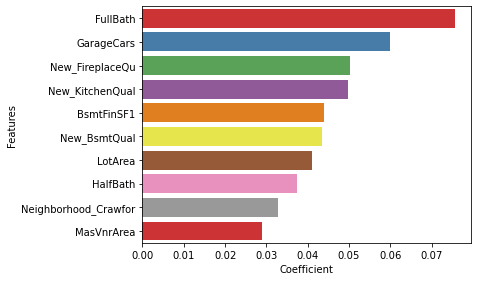

In [224]:
plt.figure(figsize = (20,20))
plt.subplot(4,3,1)
se.barplot(y = 'Features', x = 'Coefficient', palette = 'Set1', data = dtl_ten)
plt.show()